**1 - Imports**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

**2 - First exercise: Clustering some synthetic 2D data**

**2.1 - Read the file**

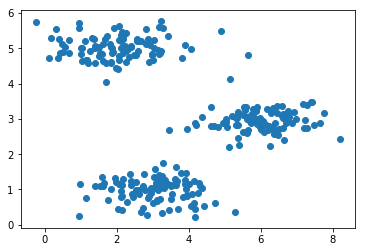

In [2]:
def extract_data(file):
    # Create matrix
    data = []

    # Open the file
    with open(file, 'r') as file:
        for line in file:
            point = line.split()
            
            data.append([float(point[0]), float(point[1])])
    
    return np.c_[np.array(data), np.zeros(len(data))]

X = extract_data('data_kmeans.txt')
plt.scatter(X[:, 0], X[:, 1])

**2.2 - Create the centroids**

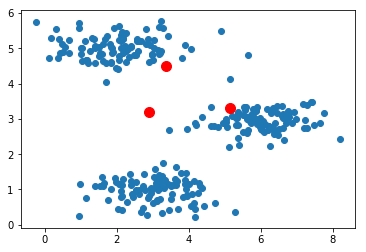

In [37]:
nb_centr = 3

centroids = np.random.uniform(low=np.amin(X) + 2, high=np.amax(X) - 2, size=(nb_centr, 2))
centroids = centroids[: , np.newaxis, :]

def plot_centroids(centroids):
    for i in range(nb_centr):
        plt.scatter(centroids[i, 0, 0], centroids[i, 0, 1], c='r', s=100)
    
plt.scatter(X[:, 0], X[:, 1])
plot_centroids(centroids)

**2.3 - Find the right position for the centroids**

In [4]:
def get_col(centr):
    if centr == 0.:
        return 'b'
    elif centr == 1.:
        return 'g'
    elif centr == 2.:
        return 'y'
    elif centr == 3.:
        return 'm'
    elif centr == 4.:
        return 'c'
    elif centr == 5.:
        return 'k'

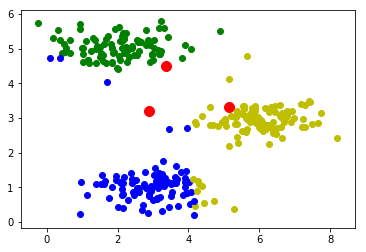

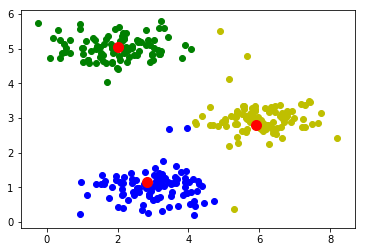

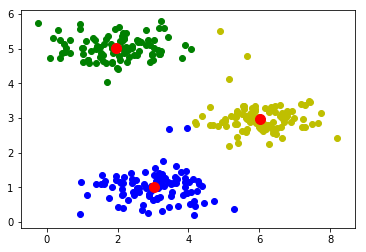

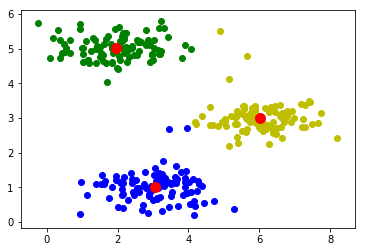

In [38]:
eps = 0.01
change = 1

# Repeat until convergence
while change > eps:
    # Get the index of the closest centroid
    X[:, -1:] = np.vstack(np.argmin(np.sqrt(((X[:, :-1] - centroids)**2).sum(axis=2)), axis=0))
    
    # Plot data
    for point in X:
        plt.scatter(point[0], point[1], c=get_col(point[2]))
        
    plot_centroids(centroids)
    plt.pause(0.05)
    plt.show()

    # Get centroids' new position
    new_centroids = np.zeros((nb_centr, 2))
    for i in range(centroids.shape[0]):
        new_centroids[i] = X[:, :2][np.where(X[:, 2] == float(i))].sum(axis=0) / (X[:, 2] == float(i)).sum()
    
    # Compute change of centroids
    change = abs((centroids - new_centroids).sum())
    
    # Update centroids
    centroids = new_centroids[: , np.newaxis, :]

**3 - Second exercise: Clustering some real 6D data**

The sourceof  this  dataset  is  theThe Student/Teacher Achievement Ratio (STAR) Projectorganized by the Tennessee State Department of Education in the USA. The reference is thefollowing: https://dataverse.harvard.edu/dataset.xhtml?persistentId=hdl:1902.1/10766

This dataset contains 6 features of 5550 students from 79 schools in the state of Tennessee: students’ free or reduced-price lunch status, number of absence days, the standarized StanfordAchievement Test Scores for reading, Math, listening and word study.

**3.1 - Extracting the data**

In [6]:
def extract_data_school(file):
    X = np.genfromtxt(file, delimiter=',')
    
    return np.delete(X, 0, axis=0)

data_school = extract_data_school('grade_students.csv')
data_school.shape

(5550, 6)

**3.2 - Defining the K-means model**
    
Let's create a more struture K-means model. We'll be able to use it again for other projects.

In [7]:
from mpl_toolkits.mplot3d import Axes3D

In [100]:
import random

class KMeans:
    
    def __init__(self, X, nb_centr):
        # Data, with the output coolumn
        self.data = np.c_[X, np.zeros(X.shape[0])]
        
        # Dimensions
        self.dim = X.shape[1]
        
        # Centroids
        self.nb_centr = nb_centr
        self.centroids = np.empty((nb_centr, self.dim))
        # Random initialisation
        for i in range(nb_centr):
            self.random_centroids(i)
        
        # We add another dimension, this will allow us to substract this array from a point,
        # and thus simplify the code
        self.centroids = self.centroids[: , np.newaxis, :]
        
        # Clusters' name
        self.clust_names = [0, 0, 0]
        
    def random_centroids(self, id):
        # We give random coords to the centroid
        self.centroids[id] = np.empty((1, self.dim))
        for i in range(self.dim):
            # The random value is in the range of the column
            coord = random.uniform(np.amin(self.data[:, i]), np.amax(self.data[:, i]))
            self.centroids[id, i] = coord
        
    def plot3d(self, ax1, ax2, ax3):
        # Create a figure
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

        # Plot all the points with the right color
        for point in res:
            ax.scatter(point[ax1], point[ax2], point[ax3], c=get_col(point[self.dim]))

        plt.show()
        
    def stats(self):
        # Print the number of students in each class
        print('Class 0:', (self.data[:, -1] == 0.).sum())
        print('Class 1:', (self.data[:, -1] == 1.).sum())
        print('Class 2:', (self.data[:, -1] == 2.).sum())
        print()
        
    def fit(self):
        eps = 0.001
        change = 1

        # Repeat until convergence
        while change > eps:
            # Get the index of the closest centroid (output column)
            self.data[:, -1:] = np.vstack(np.argmin(np.sqrt(((self.data[:, :-1] - self.centroids)**2).sum(axis=2)), axis=0))
                        
            # Get centroids' new position
            new_centroids = np.empty((nb_centr, self.dim))
            for i in range(centroids.shape[0]):
                # Get new position
                new_centroids[i] = (self.data[:, :-1][np.where(self.data[:, -1] == float(i))].sum(axis=0) + 1) / ((self.data[:, -1] == float(i)).sum() + 1)
                
                # If we had no point associated to the centroid, we move it to a new random position
                if np.array_equal(new_centroids[i], np.ones(6)):
                    new_centroids[i] = np.random.uniform(low=np.amin(self.data[:,:-1]), high=np.amax(self.data[:,:-1]), size=(1, self.dim))
                
            # Compute change of centroids
            change = abs((self.centroids - new_centroids).sum())

            # Update centroids
            self.centroids = new_centroids[: , np.newaxis, :]
            
            # Print stats
            self.stats()
            
        self.name_clusters()
    
    def name_clusters(self):
        # Compute mean value of the clusters to name them
        mean = [np.mean(centr) for centr in self.centroids[:, 0, 2:]]
        print(mean)
        
        # Get the order of the values
        order = np.argsort(mean)
        print(order)
        
        for i in range(self.nb_centr):
            if order[i] == 2:
                self.clust_names[i] = 'gifted'
            elif order[i] == 1:
                self.clust_names[i] = 'average'
            elif order[i] == 0:
                self.clust_names[i] = 'weak'
                
        print(self.clust_names)
        
    def predict(self, point):
        # Get the closest centroid
        close = np.argmin(np.sqrt(((point - self.centroids)**2).sum(axis=2)), axis=0)
        
        print('This student is:', self.clust_names[int(close)])
        

In [101]:
model = KMeans(data_school, 3)  

model.fit()

Class 0: 355
Class 1: 4698
Class 2: 497

Class 0: 1196
Class 1: 2972
Class 2: 1382

Class 0: 1682
Class 1: 2163
Class 2: 1705

Class 0: 1680
Class 1: 2230
Class 2: 1640

Class 0: 1687
Class 1: 2281
Class 2: 1582

Class 0: 1703
Class 1: 2296
Class 2: 1551

Class 0: 1713
Class 1: 2309
Class 2: 1528

Class 0: 1726
Class 1: 2304
Class 2: 1520

Class 0: 1734
Class 1: 2306
Class 2: 1510

Class 0: 1740
Class 1: 2306
Class 2: 1504

Class 0: 1745
Class 1: 2309
Class 2: 1496

Class 0: 1748
Class 1: 2310
Class 2: 1492

Class 0: 1755
Class 1: 2306
Class 2: 1489

Class 0: 1759
Class 1: 2305
Class 2: 1486

Class 0: 1762
Class 1: 2304
Class 2: 1484

Class 0: 1763
Class 1: 2305
Class 2: 1482

Class 0: 1763
Class 1: 2307
Class 2: 1480

Class 0: 1765
Class 1: 2307
Class 2: 1478

Class 0: 1768
Class 1: 2305
Class 2: 1477

Class 0: 1770
Class 1: 2304
Class 2: 1476

Class 0: 1772
Class 1: 2305
Class 2: 1473

Class 0: 1772
Class 1: 2307
Class 2: 1471

Class 0: 1772
Class 1: 2308
Class 2: 1470

Class 0: 1772

**3.3 - Let's try to visualize the data in differents 3-dimensional plots**

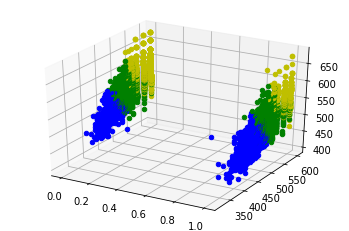

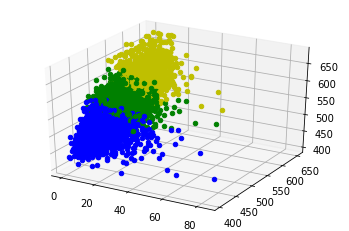

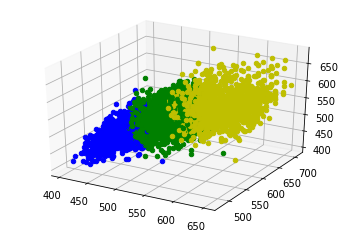

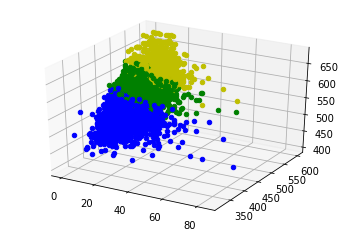

In [57]:
model.plot3d(0, 5, 3)
model.plot3d(1, 2, 3)
model.plot3d(2, 4, 3)
model.plot3d(1, 5, 3)

**3.4 - Predict the class of new points**

In [102]:
Maxime = np.array([0, 34, 629, 600, 680, 600])
Tom = np.array([1, 2, 400, 410, 430, 420])

model.predict(Maxime)
model.predict(Tom)


This student is: gifted
This student is: weak
